In [1]:
# ================================================================
# Assignment No. 1: Feature Engineering to Transform Raw Data into Informative Features
# Dataset: Bank Marketing Dataset (bank.csv)
# ================================================================


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

# Make output clearer
pd.set_option('display.max_columns', None)


In [3]:
# Step 2: Load and Explore Dataset
# ---------------------------------------------------------------
df = pd.read_csv("bank.csv", delimiter=';')   # dataset uses semicolon separator

print("Dataset Loaded Successfully!\n")
print("First 5 Rows:")
display(df.head())

print("\nDataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values per Column:")
print(df.isnull().sum())

✅ Dataset Loaded Successfully!

📊 First 5 Rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



Dataset Shape: (4521, 17)

Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing Values per Column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
# Step 3: Handle Missing Data
# ---------------------------------------------------------------
# Check if there are any missing or unknown values represented by strings like 'unknown'
print("\nUnique values in columns with potential missing info:")
for col in df.columns:
    if df[col].dtype == 'object':
        if 'unknown' in df[col].unique():
            print(f"{col}: contains 'unknown' values")

# Replace 'unknown' with mode for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

print("\nMissing/Unknown values handled successfully!")
print(df.isnull().sum())


Unique values in columns with potential missing info:
poutcome: contains 'unknown' values

Missing/Unknown values handled successfully!
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [14]:
# Step 4: Encode Categorical Variables
# ---------------------------------------------------------------
cat_cols = df.select_dtypes(include="object").columns
print("\nCategorical Columns:", list(cat_cols))

# Label Encoding for target variable and One-Hot Encoding for others
le = LabelEncoder()
if 'y' in df.columns:
    df['y'] = le.fit_transform(df['y'])  # yes/no → 1/0

df_encoded = pd.get_dummies(df, columns=[col for col in cat_cols if col != 'y'], drop_first=True)

print(" Encoding Done! New Shape:", df_encoded.shape)


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 Encoding Done! New Shape: (4521, 40)


In [15]:
# Step 5: Feature Scaling (Standardization)
# ---------------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.select_dtypes(include=np.number))
scaled_df = pd.DataFrame(scaled_data, columns=df_encoded.select_dtypes(include=np.number).columns)

print("\n Scaling Done! Scaled Data Preview:")
display(scaled_df.head())



 Scaling Done! Scaled Data Preview:


,age,balance,day,duration,campaign,pdays,previous,y
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,-0.360902
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,-0.360902
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,-0.360902
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,-0.360902
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,-0.360902



Explained Variance Ratio by PCA: [0.21351402 0.16811152]


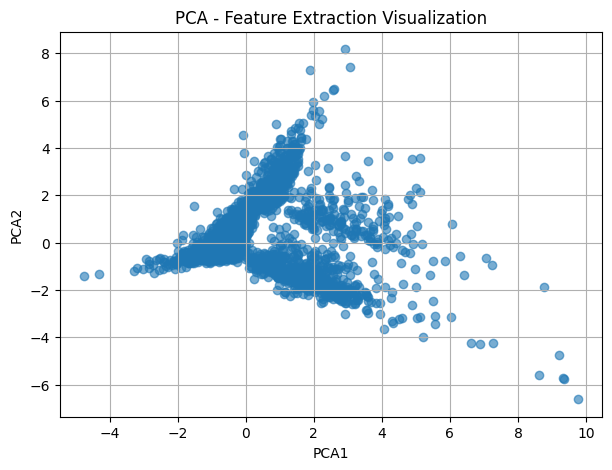

In [7]:
# Step 6: Feature Extraction (PCA)
# ---------------------------------------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

print("\nExplained Variance Ratio by PCA:", pca.explained_variance_ratio_)

plt.figure(figsize=(7,5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.6)
plt.title("PCA - Feature Extraction Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()

In [11]:
#️Step 7: Feature Selection (Variance Threshold + SelectKBest)

#  1. Variance Threshold – remove low variance features
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

selector = VarianceThreshold(threshold=0.01)
selected_data = selector.fit_transform(scaled_df)
selected_df = scaled_df.iloc[:, selector.get_support(indices=True)]
print("\nAfter Variance Threshold - Shape:", selected_df.shape)

# 2. SelectKBest – select top features based on ANOVA F-value
y = df_encoded['y']                                  # Target variable
X = df_encoded.drop('y', axis=1)                     # Feature variables

best = SelectKBest(score_func=f_classif, k=5)        # Select top 5 features

# Apply only on numeric columns to avoid issues
X_num = X.select_dtypes(include=np.number)

# Fit the selector
X_new = best.fit_transform(X_num, y)

#  Get the top 5 feature names safely
selected_features = X_num.columns[best.get_support()]

print("\n Top 5 Selected Features using SelectKBest:")
for feature in selected_features:
    print("-", feature)



After Variance Threshold - Shape: (4521, 8)

 Top 5 Selected Features using SelectKBest:
- age
- duration
- campaign
- pdays
- previous


In [12]:
# Step 8: Summary of Transformations
# ---------------------------------------------------------------
print("\n--- SUMMARY ---")
print("Original Dataset Shape:", df.shape)
print("After Encoding:", df_encoded.shape)
print("After Scaling:", scaled_df.shape)
print("After PCA:", pca_df.shape)
print("After Feature Selection:", selected_df.shape)
print("\n Feature Engineering Completed Successfully!")



--- SUMMARY ---
Original Dataset Shape: (4521, 17)
After Encoding: (4521, 40)
After Scaling: (4521, 8)
After PCA: (4521, 2)
After Feature Selection: (4521, 8)

 Feature Engineering Completed Successfully!
